In [55]:
#add dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#create variable to hold path for csv file
hac = "HappinessAlcoholConsumption.csv"
whr = "world-happiness-report-2021.csv"

#read csv file and store in pd frame
hac_read = pd.read_csv(hac)
# hac_read.head()
whr_read = pd.read_csv(whr)
# whr_read.head()

# rename country column
renamed_hac = hac_read.rename(columns={"Country":"Country name"})
renamed_hac.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [56]:

# Merge data frames
merge_df = pd.merge(renamed_hac, whr_read, on="Country name", how="inner")
merge_df.head()

,Country name,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Regional indicator,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278,Western Europe,...,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280,Western Europe,...,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78,Western Europe,...,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129,Western Europe,...,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97,Western Europe,...,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


In [57]:
# clean data frames for analysis
clean_data = merge_df[["Country name", "Region", "HappinessScore", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita", "Explained by: Log GDP per capita", "Perceptions of corruption", "Explained by: Social support", "Explained by: Freedom to make life choices"]]
clean_data.head()

,Country name,Region,HappinessScore,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Explained by: Log GDP per capita,Perceptions of corruption,Explained by: Social support,Explained by: Freedom to make life choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [58]:
# rename cloumns
group_df = clean_data.rename(columns={"Country name":"Country", 
                                   "HappinessScore":"Happiness Score", 
                                   "Beer_PerCapita": "Beer (Per Capita)", 
                                   "Spirit_PerCapita": "Spirit (Per Capita)",
                                   "Wine_PerCapita": "Wine (Per Capita)",
                                   "Explained by: Log GDP per capita": "GDP (Per Capita)",
                                   "Perceptions of corruption": "Perceptions of Corruption",
                                   "Explained by: Social support": "Social Support",
                                   "Explained by: Freedom to make life choices": "Life Choices"})
group_df.head()

,Country,Region,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
0,Denmark,Western Europe,7.526,224,81,278,1.502,0.179,1.108,0.686
1,Switzerland,Western Europe,7.509,185,100,280,1.566,0.292,1.079,0.653
2,Iceland,Western Europe,7.501,233,61,78,1.482,0.673,1.172,0.698
3,Norway,Western Europe,7.498,169,71,129,1.543,0.270,1.108,0.703
4,Finland,Western Europe,7.413,263,133,97,1.446,0.186,1.106,0.691


In [59]:
group_df.dtypes

Country                       object
Region                        object
Happiness Score              float64
Beer (Per Capita)              int64
Spirit (Per Capita)            int64
Wine (Per Capita)              int64
GDP (Per Capita)             float64
Perceptions of Corruption    float64
Social Support               float64
Life Choices                 float64
dtype: object

In [60]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    111 non-null    object 
 1   Region                     111 non-null    object 
 2   Happiness Score            111 non-null    float64
 3   Beer (Per Capita)          111 non-null    int64  
 4   Spirit (Per Capita)        111 non-null    int64  
 5   Wine (Per Capita)          111 non-null    int64  
 6   GDP (Per Capita)           111 non-null    float64
 7   Perceptions of Corruption  111 non-null    float64
 8   Social Support             111 non-null    float64
 9   Life Choices               111 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.5+ KB


In [61]:

group_df.describe()

,Happiness Score,Beer (Per Capita),Spirit (Per Capita),Wine (Per Capita),GDP (Per Capita),Perceptions of Corruption,Social Support,Life Choices
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,5.575901,139.405405,97.702703,70.801802,1.042748,0.723297,0.837730,0.516207
std,1.138702,105.705455,79.714672,90.901827,0.388376,0.190145,0.249245,0.128776
min,3.303000,1.000000,1.000000,1.000000,0.113000,0.082000,0.058000,0.175000
25%,4.645000,42.000000,28.000000,4.000000,0.843500,0.658000,0.696000,0.435500
50%,5.546000,127.000000,87.000000,18.000000,1.099000,0.799000,0.899000,0.536000
75%,6.516500,227.500000,140.000000,123.500000,1.372500,0.847500,1.043000,0.619500
max,7.526000,376.000000,373.000000,370.000000,1.751000,0.939000,1.172000,0.716000


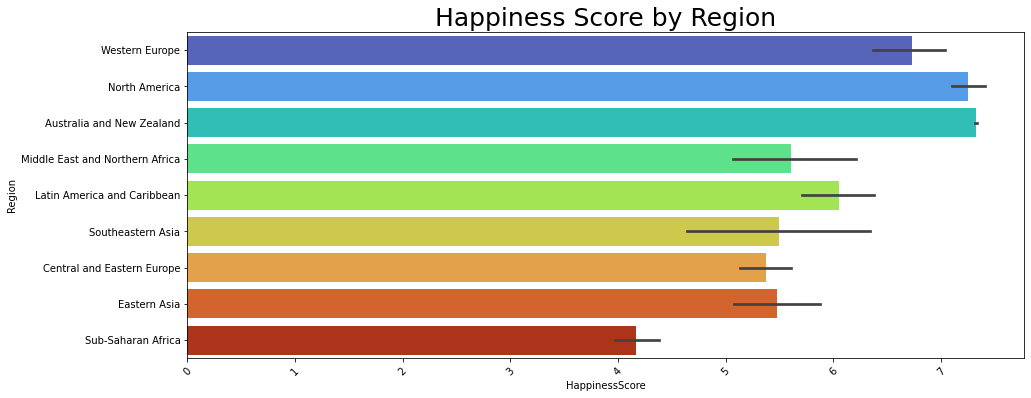

In [62]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x ='HappinessScore',y= 'Region',data = clean_data, palette = 'turbo')
plt.title('Happiness Score by Region', fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

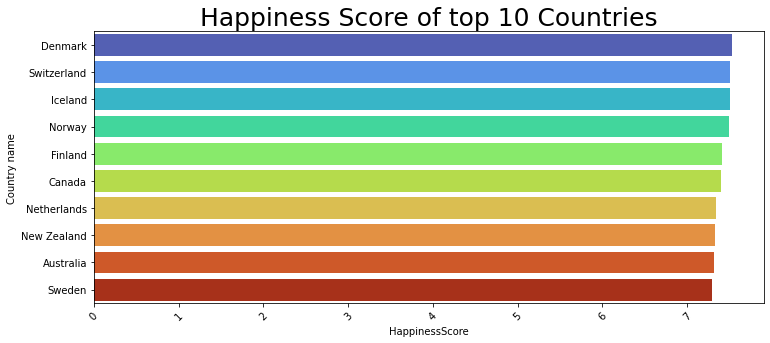

In [63]:
import seaborn as sns
plt.figure(figsize = (12,5))
sns.barplot(x ='HappinessScore',y= 'Country name',data = clean_data.nlargest(10,'HappinessScore'), palette = 'turbo')
plt.title('Happiness Score of top 10 Countries', fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

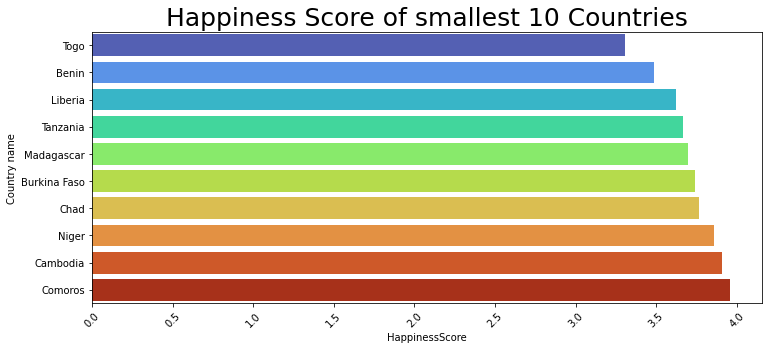

In [64]:
import seaborn as sns
plt.figure(figsize = (12,5))
sns.barplot(x ='HappinessScore',y= 'Country name',data = clean_data.nsmallest(10,'HappinessScore'), palette = 'turbo')
plt.title('Happiness Score of smallest 10 Countries', fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

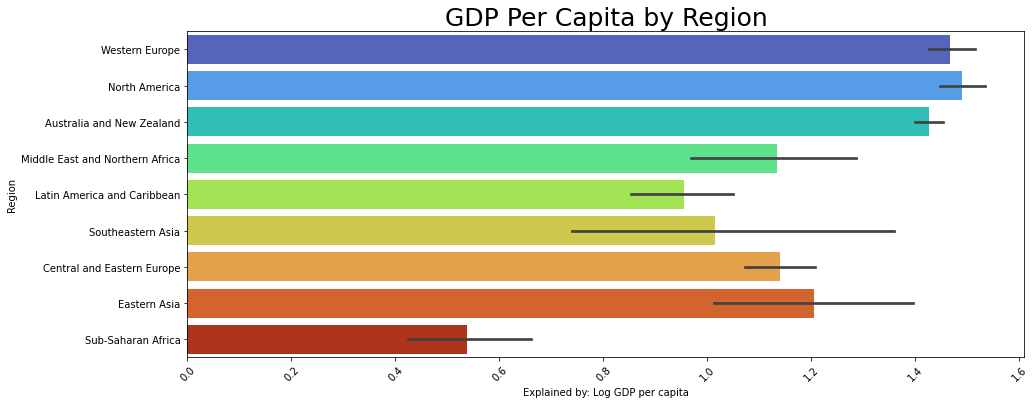

In [65]:
import seaborn as sns
plt.figure(figsize = (15,6))
sns.barplot(x = 'Explained by: Log GDP per capita',y= 'Region', data = clean_data, palette = 'turbo')
plt.title('GDP Per Capita by Region', fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

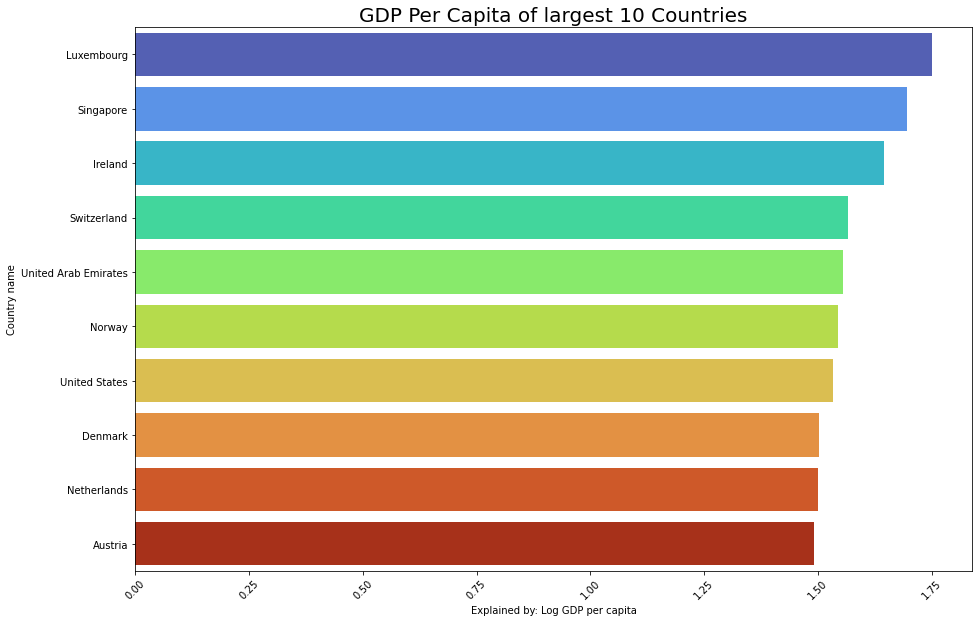

In [75]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Explained by: Log GDP per capita',y= 'Country name', data=clean_data.nlargest(10,'Explained by: Log GDP per capita'), palette = 'turbo')
plt.title('GDP Per Capita of largest 10 Countries', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

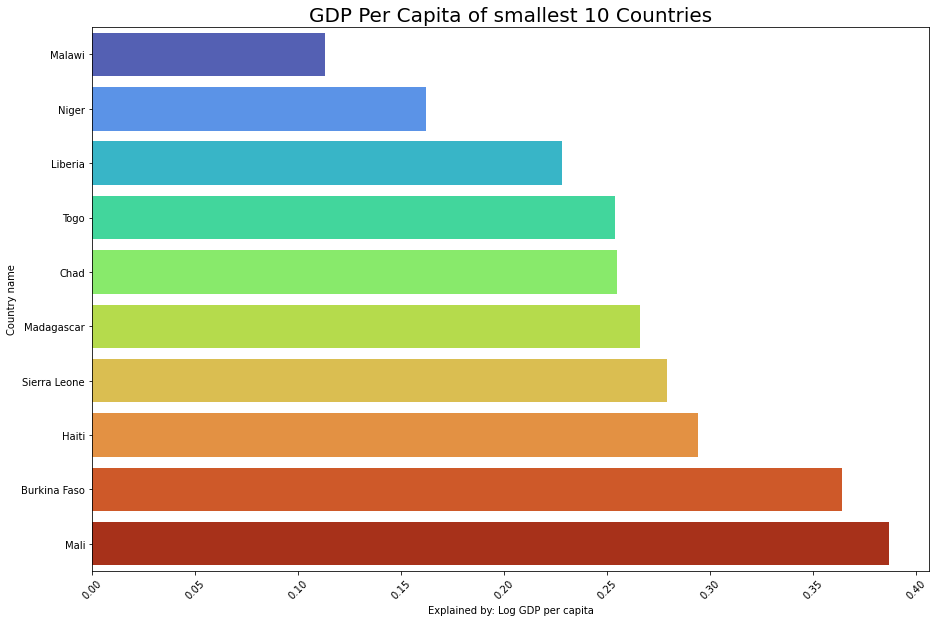

In [74]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x ='Explained by: Log GDP per capita',y= 'Country name', data=clean_data.nsmallest(10,'Explained by: Log GDP per capita'), palette = 'turbo')
plt.title('GDP Per Capita of smallest 10 Countries', fontsize = 20)
plt.xticks(rotation = 45)
plt.show()